# **PREDICTION FOR CREDIT CARD APPROVAL**


> The primary objective of this project is to predict the approval or rejection of credit card applications. The challenge lies in understanding the key factors influencing credit card approval decisions and building a predictive model to assist in the decision-making process.

***Dataset Overview:***

The dataset contains the following columns:
*   `ID` : Unique identifier for each record.
*   `Gender` : Gender of the applicant.
*   `Has a car` : Indicates whether the applicant owns a car (binary: 0 or 1).
*   `Has a property` : Indicates whether the applicant owns a property (binary: 0 or 1).
*   `Children count` : Number of children the applicant has.
*   `Income` : Income of the applicant.
*   `Employment status` : Employment status of the applicant.
*   `Education level` : Highest education level attained by the applicant.
*   `Marital status` : Marital status of the applicant.
*   `Dwelling` : Type of dwelling the applicant resides in.
*   `Age` : Age of the applicant.
*   `Employment length` : Duration of the applicant's current employment.
*   `Has a mobile phone` : Indicates whether the applicant has a mobile phone (binary: 0 or 1).
*   `Has a work phone` : Indicates whether the applicant has a work phone (binary: 0 or 1).
*   `Has a phone` : Indicates whether the applicant has any phone (binary: 0 or 1).
*   `Has an email` : Indicates whether the applicant has an email (binary: 0 or 1).
*   `Job title` : Title or position of the applicant's job.
*   `Family member count` : Number of family members.
*   `Account age` : Age of the applicant's account.
*   `Is high risk (Target Variable)`: Whether the applicant is considered high risk (0 for no, 1 for yes).

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**EXPLORATORY DATA ANALYSIS**

Exploratory Data Analysis (EDA) is a statistical approach used to analyze datasets and summarize their main characteristics. It emphasizes using graphical techniques to get a sense of the data before applying formal modeling or hypothesis testing

*   ***Understanding the data*** : EDA helps you summarize the data's key characteristics, like central tendencies and distributions of different variables.
*  ***Finding patterns*** : By visualizing the data, you can discover patterns and relationships between variables that might not be obvious from just looking at raw numbers.

*  ***Identifying issues*** : EDA can help you spot outliers, missing values, or other errors in the data that could affect your analysis.


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
import warnings
warnings.filterwarnings("ignore")

In [116]:
df=pd.read_csv("/content/drive/MyDrive/train_data.csv")
data=pd.read_csv("/content/drive/MyDrive/test_data.csv")

In [117]:
print("Train Data")
df.head()

Train Data


,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [118]:
print("Test Data")
data.head()

Test Data


,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0


**TRAINING DATA**

In [119]:
print("TRAIN SHAPE\n")
df.shape

TRAIN SHAPE



(29165, 20)

In [120]:
# Display basic information about the DataFrame
print("INFO")
df.info()

# Check for missing values
print("\nISNULL")
df.isnull().sum()

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [121]:
df.columns

Index(['ID', 'Gender', 'Has a car', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a mobile phone',
       'Has a work phone', 'Has a phone', 'Has an email', 'Job title',
       'Family member count', 'Account age', 'Is high risk'],
      dtype='object')

In [122]:
df.dtypes

ID                       int64
Gender                  object
Has a car               object
Has a property          object
Children count           int64
Income                 float64
Employment status       object
Education level         object
Marital status          object
Dwelling                object
Age                      int64
Employment length        int64
Has a mobile phone       int64
Has a work phone         int64
Has a phone              int64
Has an email             int64
Job title               object
Family member count    float64
Account age            float64
Is high risk             int64
dtype: object

In [123]:
# Summary statistics of numerical columns
print("\nDESCRIBE")
df.describe()


DESCRIBE


,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [124]:
#Unique values in the dataset
df.nunique()

ID                     29165
Gender                     2
Has a car                  2
Has a property             2
Children count             9
Income                   259
Employment status          5
Education level            5
Marital status             5
Dwelling                   6
Age                     6794
Employment length       3483
Has a mobile phone         1
Has a work phone           2
Has a phone                2
Has an email               2
Job title                 18
Family member count       10
Account age               61
Is high risk               2
dtype: int64

**TESTING DATA**

In [125]:
print("TEST SHAPE\n")
data.shape

TEST SHAPE



(7292, 20)

In [126]:
# Display basic information about the DataFrame
print("INFO")
data.info()

# Check for missing values
print("\nISNULL")
data.isnull().sum()

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   object 
 2   Has a car            7292 non-null   object 
 3   Has a property       7292 non-null   object 
 4   Children count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment status    7292 non-null   object 
 7   Education level      7292 non-null   object 
 8   Marital status       7292 non-null   object 
 9   Dwelling             7292 non-null   object 
 10  Age                  7292 non-null   int64  
 11  Employment length    7292 non-null   int64  
 12  Has a mobile phone   7292 non-null   int64  
 13  Has a work phone     7292 non-null   int64  
 14  Has a phone          7292 non-null   int64  
 15  Has an email         7292 non-nul

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              2296
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [127]:
data.columns

Index(['ID', 'Gender', 'Has a car', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a mobile phone',
       'Has a work phone', 'Has a phone', 'Has an email', 'Job title',
       'Family member count', 'Account age', 'Is high risk'],
      dtype='object')

In [128]:
data.dtypes

ID                       int64
Gender                  object
Has a car               object
Has a property          object
Children count           int64
Income                 float64
Employment status       object
Education level         object
Marital status          object
Dwelling                object
Age                      int64
Employment length        int64
Has a mobile phone       int64
Has a work phone         int64
Has a phone              int64
Has an email             int64
Job title               object
Family member count    float64
Account age            float64
Is high risk             int64
dtype: object

In [129]:
# Summary statistics of numerical columns
print("\nDESCRIBE")
data.describe()


DESCRIBE


,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,7.292000e+03,7292.000000,7.292000e+03,7292.000000,7292.000000,7292.0,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000
mean,5.078209e+06,0.428415,1.858672e+05,-15957.958722,59283.630691,1.0,0.230389,0.294158,0.087493,2.202139,-26.270022,0.016045
std,4.208243e+04,0.744350,1.032964e+05,4190.990010,137642.577749,0.0,0.421111,0.455695,0.282576,0.909726,16.563032,0.125657
min,5.008809e+06,0.000000,2.700000e+04,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.041912e+06,0.000000,1.170000e+05,-19382.000000,-3141.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.069416e+06,0.000000,1.575000e+05,-15522.000000,-1534.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.115503e+06,1.000000,2.250000e+05,-12454.000000,-397.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150487e+06,14.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,0.000000,1.000000


In [130]:
#Unique values in the dataset
data.nunique()

ID                     7292
Gender                    2
Has a car                 2
Has a property            2
Children count            7
Income                  190
Employment status         5
Education level           5
Marital status            5
Dwelling                  6
Age                    3988
Employment length      2429
Has a mobile phone        1
Has a work phone          2
Has a phone               2
Has an email              2
Job title                18
Family member count       8
Account age              61
Is high risk              2
dtype: int64

**Univariate Analysis:**

For Categorical values, use Frequency table and bar chart

For Continuous values, use Histogram and Descriptive Statistics

Frequency table for Gender:
Gender
F    19549
M     9616
Name: count, dtype: int64



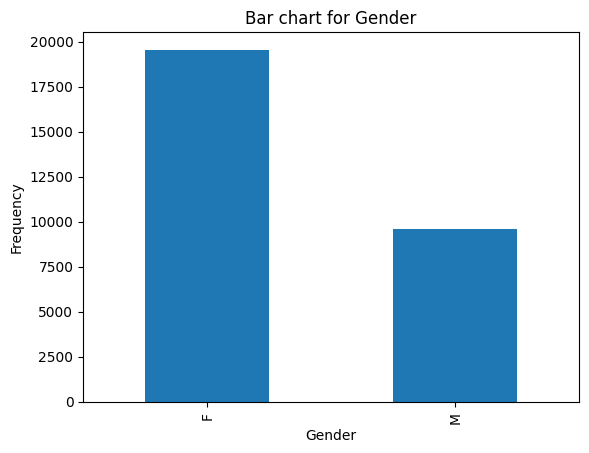

Frequency table for Has a car:
Has a car
N    18128
Y    11037
Name: count, dtype: int64



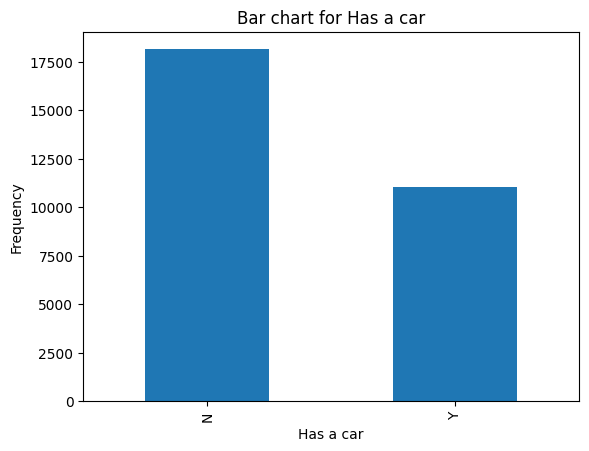

Frequency table for Has a property:
Has a property
Y    19557
N     9608
Name: count, dtype: int64



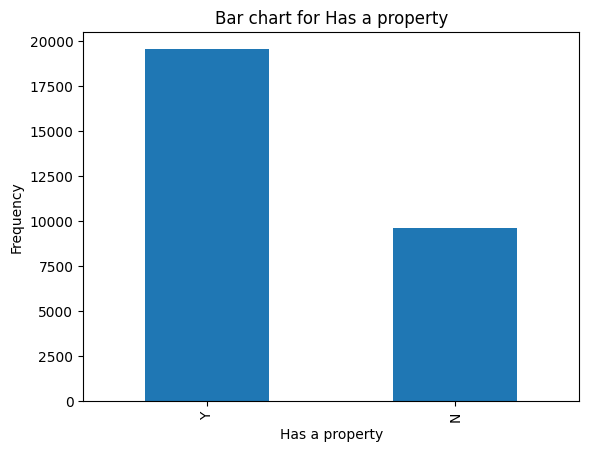

Frequency table for Employment status:
Employment status
Working                 15056
Commercial associate     6801
Pensioner                4920
State servant            2381
Student                     7
Name: count, dtype: int64



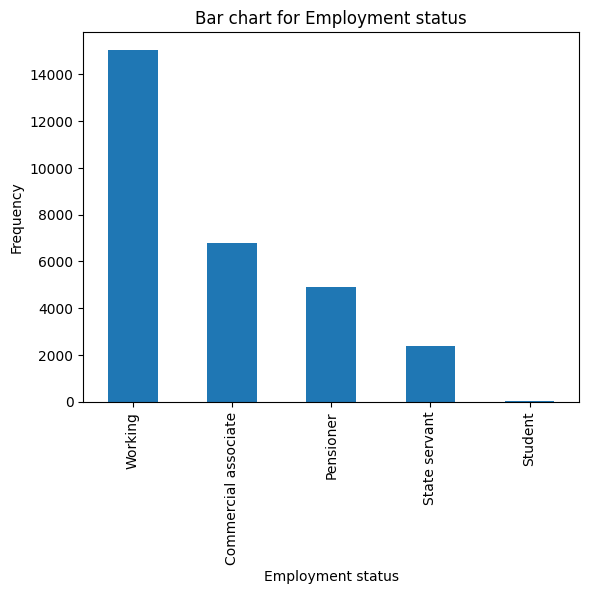

Frequency table for Education level:
Education level
Secondary / secondary special    19803
Higher education                  7910
Incomplete higher                 1129
Lower secondary                    298
Academic degree                     25
Name: count, dtype: int64



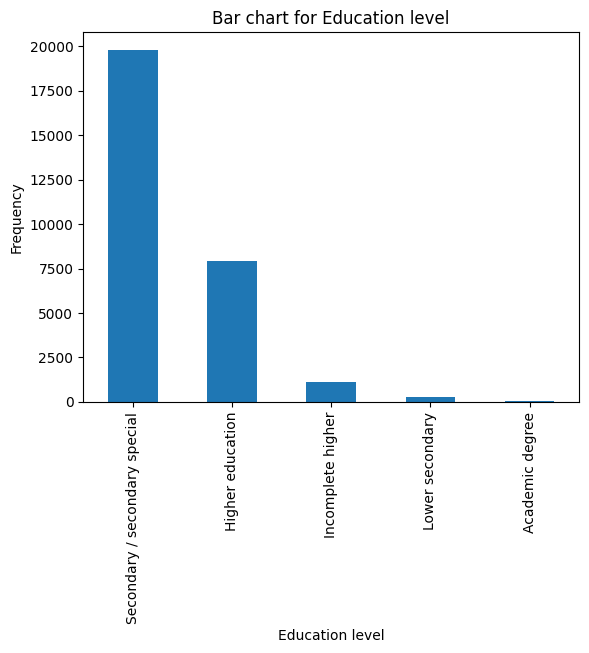

Frequency table for Marital status:
Marital status
Married                 20044
Single / not married     3864
Civil marriage           2312
Separated                1712
Widow                    1233
Name: count, dtype: int64



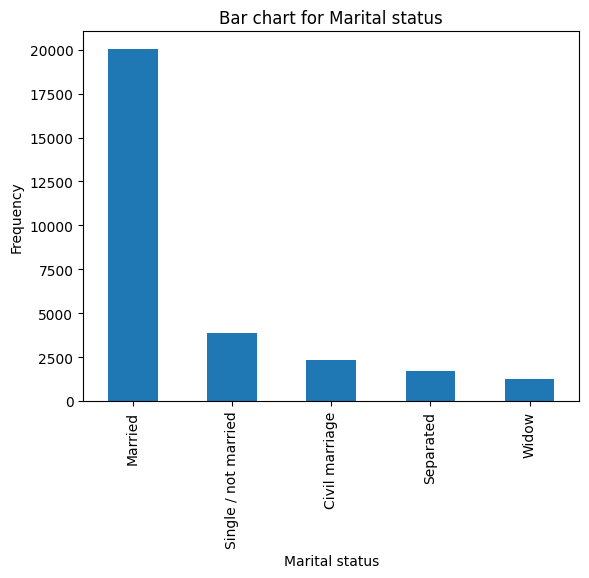

Frequency table for Dwelling:
Dwelling
House / apartment      26059
With parents            1406
Municipal apartment      912
Rented apartment         453
Office apartment         208
Co-op apartment          127
Name: count, dtype: int64



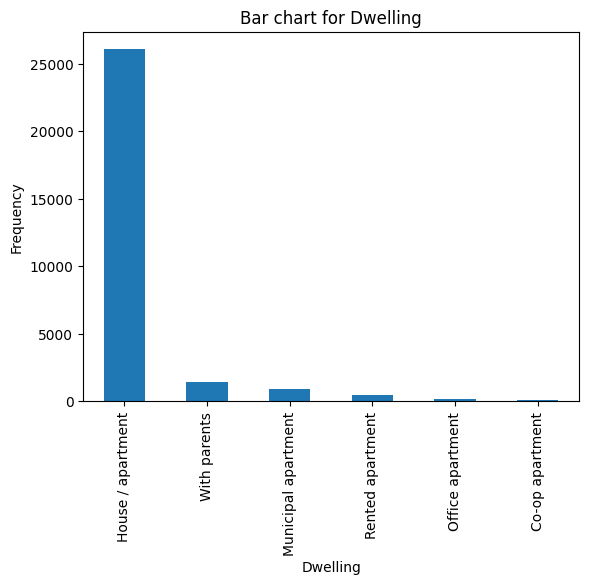

Frequency table for Has a mobile phone:
Has a mobile phone
1    29165
Name: count, dtype: int64



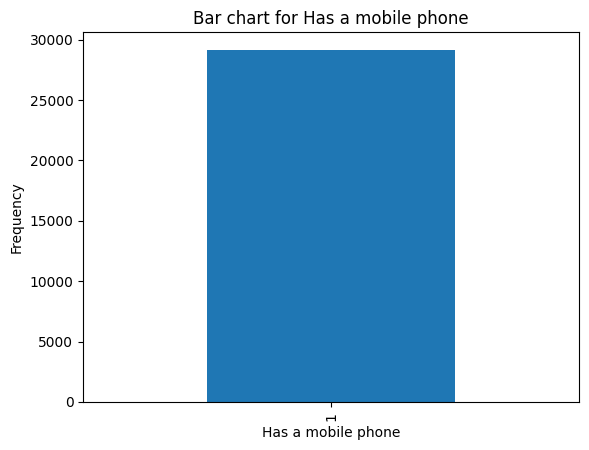

Frequency table for Has a work phone:
Has a work phone
0    22623
1     6542
Name: count, dtype: int64



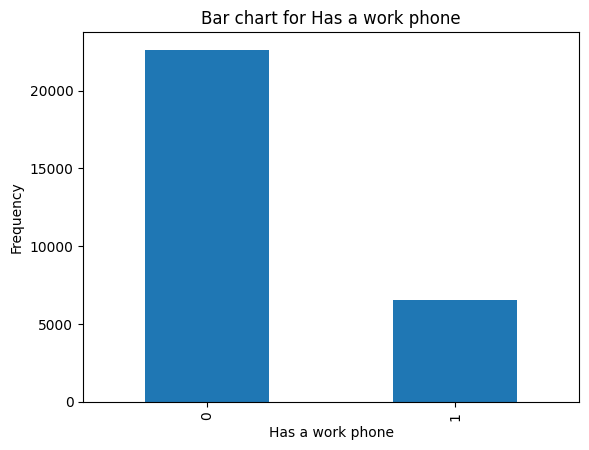

Frequency table for Has a phone:
Has a phone
0    20562
1     8603
Name: count, dtype: int64



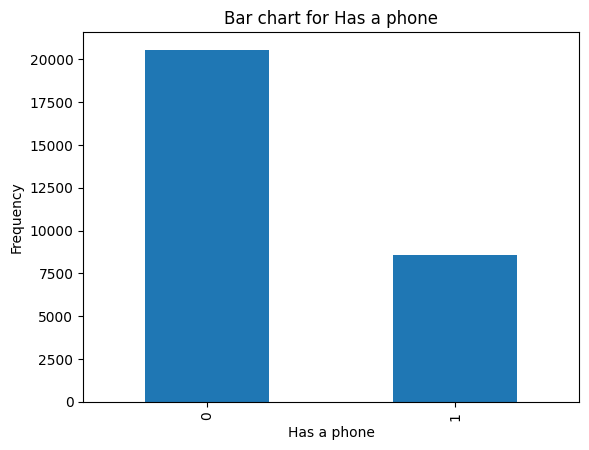

Frequency table for Has an email:
Has an email
0    26532
1     2633
Name: count, dtype: int64



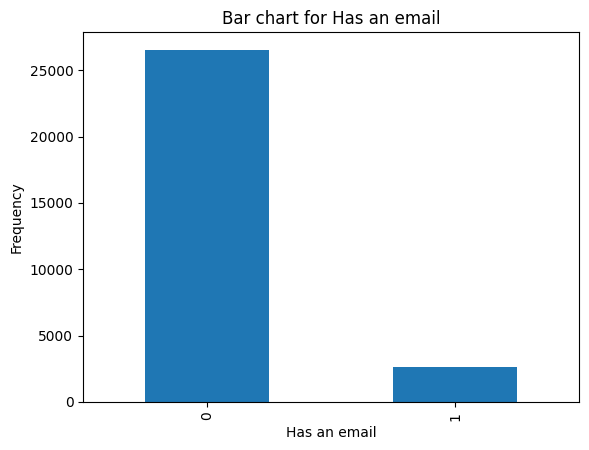

Frequency table for Job title:
Job title
Laborers                 5004
Core staff               2866
Sales staff              2773
Managers                 2422
Drivers                  1722
High skill tech staff    1133
Accountants               998
Medicine staff            956
Cooking staff             521
Security staff            464
Cleaning staff            425
Private service staff     287
Low-skill Laborers        138
Waiters/barmen staff      127
Secretaries               122
HR staff                   72
Realty agents              60
IT staff                   48
Name: count, dtype: int64



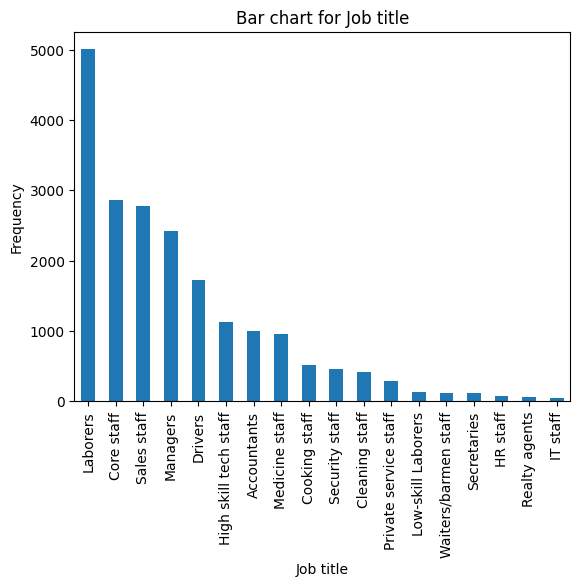

In [131]:
# Frequency Table and Bar chart for categorical columns
# Select categorical columns
categorical_cols = ['Gender', 'Has a car', 'Has a property', 'Employment status',
                     'Education level', 'Marital status', 'Dwelling', 'Has a mobile phone',
                    'Has a work phone','Has a phone','Has an email','Job title']

# Loop through categorical columns and generate frequency tables and bar charts
for col in categorical_cols:
    # Frequency table
    freq_table = df[col].value_counts()
    print(f"Frequency table for {col}:\n{freq_table}\n")

    # Bar chart
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Bar chart for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [132]:
# Import libraries
from scipy.stats import chi2_contingency

# Define categorical features for analysis
categorical_features = ['Gender', 'Has a car', 'Has a property', 'Employment status',
                         'Education level', 'Marital status', 'Dwelling', 'Has a mobile phone',
                         'Has a work phone', 'Has a phone', 'Has an email','Job title']

# Loop through each categorical feature
for feature in categorical_features:
  # Create crosstabulation with target variable
  crosstab = pd.crosstab(df[feature], df['Is high risk'])
  print(f"\nCrosstabulation of {feature} with 'Is high risk':\n")
  print(crosstab)

  # Perform Chi-square test
  contingency_table = crosstab.values  # Get the values from the crosstab
  chi2, pval, deg_of_freedom, expected_freq = chi2_contingency(contingency_table)

  # Print the results
  print(f"\nChi-square test results for {feature}:")
  print(f"Chi-Square: {chi2:.2f}")
  print(f"p-value: {pval:.4f}")

  # Interpret the p-value (adjust significance level based on the number of tests)
  if pval < 0.05:
      print("  - There is a statistically significant relationship between", feature, "and credit risk.")
  else:
      print("  - There is no statistically significant relationship between", feature, "and credit risk.")




Crosstabulation of Gender with 'Is high risk':

Is high risk      0    1
Gender                  
F             19243  306
M              9423  193

Chi-square test results for Gender:
Chi-Square: 7.22
p-value: 0.0072
  - There is a statistically significant relationship between Gender and credit risk.

Crosstabulation of Has a car with 'Is high risk':

Is high risk      0    1
Has a car               
N             17811  317
Y             10855  182

Chi-square test results for Has a car:
Chi-Square: 0.35
p-value: 0.5551
  - There is no statistically significant relationship between Has a car and credit risk.

Crosstabulation of Has a property with 'Is high risk':

Is high risk        0    1
Has a property            
N                9398  210
Y               19268  289

Chi-square test results for Has a property:
Chi-Square: 18.78
p-value: 0.0000
  - There is a statistically significant relationship between Has a property and credit risk.

Crosstabulation of Employment status with

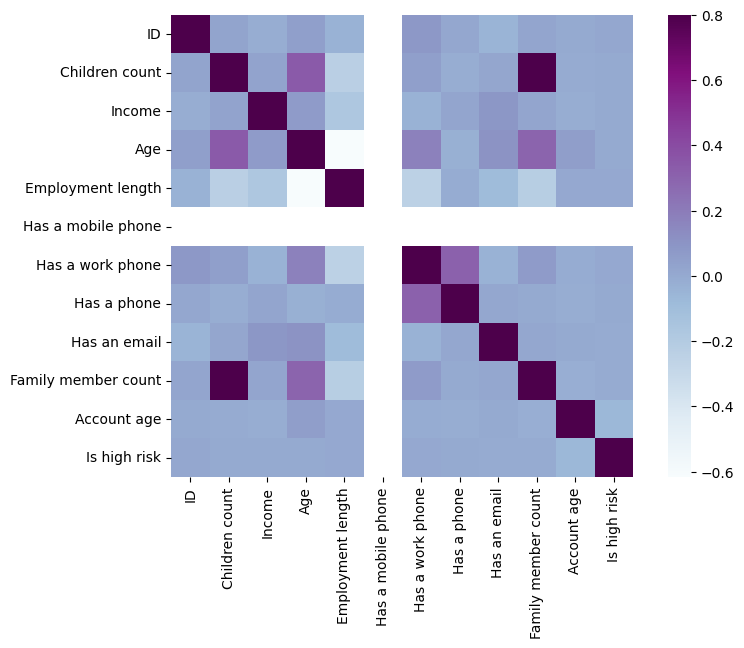

In [133]:
# HEATMAP REPRESENTATION OF THE CORRELATION
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

matrix = numeric_df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")
plt.show() # Add this to display the plot

In [134]:
# Encoding Training data
def encode_categorical_features(df):

    categorical_features = {
        'Gender': {'F': 0, 'M': 1},
        'Marital status': {
            'Single / not married': 0,
            'Married': 1,
            'Civil marriage': 2,
            'Widow': 3,
            'Separated': 4
        },
        'Has a car': {'N': 0, 'Y': 1},
        'Has a property': {'N': 0, 'Y': 1},
        'Employment status': {
            'Commercial associate': 0,
            'Pensioner': 1,
            'State servant': 2,
            'Student': 3,
            'Working': 4
        },
        'Education level': {
            'Academic degree': 0,
            'Higher education': 1,
            'Incomplete higher': 2,
            'Lower secondary': 3,
            'Secondary / secondary special': 4
        },
        'Dwelling': {
            'Co-op apartment': 0,
            'House / apartment': 1,
            'Municipal apartment': 2,
            'Office apartment': 3,
            'Rented apartment': 4,
            'With parents': 5
        }
    }

    for feature, mapping in categorical_features.items():
        df[feature] = df[feature].map(mapping)

    return df

# Encode categorical features
df = encode_categorical_features(df.copy())

# Use the encoded data for further analysis or modeling
print(df.head())


        ID  Gender  Has a car  Has a property  Children count    Income  \
0  5037048       1          1               1               0  135000.0   
1  5044630       0          1               0               1  135000.0   
2  5079079       0          0               1               2  180000.0   
3  5112872       0          1               1               0  360000.0   
4  5105858       0          0               0               0  270000.0   

   Employment status  Education level  Marital status  Dwelling    Age  \
0                  4                4               1         5 -16271   
1                  0                1               0         1 -10130   
2                  0                4               1         1 -12821   
3                  0                1               0         1 -20929   
4                  4                4               4         1 -16207   

   Employment length  Has a mobile phone  Has a work phone  Has a phone  \
0              -3111         

In [135]:
# Encoding Testing Data
def encode_categorical_features(data):

    categorical_features = {
        'Gender': {'F': 0, 'M': 1},
        'Marital status': {
            'Single / not married': 0,
            'Married': 1,
            'Civil marriage': 2,
            'Widow': 3,
            'Separated': 4
        },
        'Has a car': {'N': 0, 'Y': 1},
        'Has a property': {'N': 0, 'Y': 1},
        'Employment status': {
            'Commercial associate': 0,
            'Pensioner': 1,
            'State servant': 2,
            'Student': 3,
            'Working': 4
        },
        'Education level': {
            'Academic degree': 0,
            'Higher education': 1,
            'Incomplete higher': 2,
            'Lower secondary': 3,
            'Secondary / secondary special': 4
        },
        'Dwelling': {
            'Co-op apartment': 0,
            'House / apartment': 1,
            'Municipal apartment': 2,
            'Office apartment': 3,
            'Rented apartment': 4,
            'With parents': 5
        }
    }

    for feature, mapping in categorical_features.items():
        data[feature] = data[feature].map(mapping)

    return data


# Encode categorical features
data = encode_categorical_features(data.copy())

# Use the encoded data for further analysis or modeling
print(data.head())


        ID  Gender  Has a car  Has a property  Children count    Income  \
0  5091261       0          0               1               0  202500.0   
1  5096963       1          1               0               0  675000.0   
2  5087880       0          0               0               0  234000.0   
3  5021949       0          1               1               0  445500.0   
4  5105705       0          1               0               0  225000.0   

   Employment status  Education level  Marital status  Dwelling    Age  \
0                  2                4               4         1 -16834   
1                  0                1               1         1 -18126   
2                  2                1               2         1 -21967   
3                  0                1               1         1 -12477   
4                  4                4               1         2 -12155   

   Employment length  Has a mobile phone  Has a work phone  Has a phone  \
0              -1692         

In [136]:
# Training Data
df.drop(columns=['ID'], inplace=True)
df.drop(columns=['Job title'], inplace=True)

In [137]:
# Testing Data
data.drop(columns=['ID'], inplace=True)
data.drop(columns=['Job title'], inplace=True)

In [138]:
print("TRAIN DATA\n")
df.isnull().sum()

TRAIN DATA



Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Family member count    0
Account age            0
Is high risk           0
dtype: int64

In [139]:
print("TEST DATA\n")
data.isnull().sum()

TEST DATA



Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Family member count    0
Account age            0
Is high risk           0
dtype: int64

In [140]:
# Check Data Types
print("Train Data Types\n",df.dtypes)
print('-'*30)
print("Test Data Types\n",data.dtypes)

Train Data Types
 Gender                   int64
Has a car                int64
Has a property           int64
Children count           int64
Income                 float64
Employment status        int64
Education level          int64
Marital status           int64
Dwelling                 int64
Age                      int64
Employment length        int64
Has a mobile phone       int64
Has a work phone         int64
Has a phone              int64
Has an email             int64
Family member count    float64
Account age            float64
Is high risk             int64
dtype: object
------------------------------
Test Data Types
 Gender                   int64
Has a car                int64
Has a property           int64
Children count           int64
Income                 float64
Employment status        int64
Education level          int64
Marital status           int64
Dwelling                 int64
Age                      int64
Employment length        int64
Has a mobile phone   

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [142]:
# 'df' is your training data and 'data' is your testing data
X_train = df.drop('Is high risk', axis=1)
y_train = df['Is high risk']
X_test = data.drop('Is high risk', axis=1)  # Assuming 'Is high risk' is present in the test data
y_test = data['Is high risk']

In [143]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'SVM': SVC(probability=True),
    'kNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier()
}

In [144]:
evaluated_models = []

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Assuming you want probabilities for the positive class
    print(f"Metrics for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob)}")
    print('-' * 30)
    # Append model and its accuracy
    accuracy = accuracy_score(y_test, y_pred)
    evaluated_models.append((name, model, accuracy))


Metrics for Logistic Regression:
Accuracy: 0.9839550191991223
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[7175    0]
 [ 117    0]]
ROC AUC Score: 0.49871765091277287
------------------------------
Metrics for Random Forest:
Accuracy: 0.9821722435545803
Precision: 0.3488372093023256
Recall: 0.1282051282051282
F1 Score: 0.18749999999999997
Confusion Matrix:
 [[7147   28]
 [ 102   15]]
ROC AUC Score: 0.7164727954971857
------------------------------
Metrics for Gradient Boosting:
Accuracy: 0.9836807460230389
Precision: 0.375
Recall: 0.02564102564102564
F1 Score: 0.048
Confusion Matrix:
 [[7170    5]
 [ 114    3]]
ROC AUC Score: 0.6691050954465588
------------------------------
Metrics for XGBoost:
Accuracy: 0.9829950630828305
Precision: 0.3333333333333333
Recall: 0.05982905982905983
F1 Score: 0.10144927536231885
Confusion Matrix:
 [[7161   14]
 [ 110    7]]
ROC AUC Score: 0.7359200690908008
------------------------------
Metrics for SVM:
Accuracy: 0.9839550191991223
Prec

In [145]:
# Sort models by accuracy (descending)
evaluated_models.sort(key=lambda x: x[2], reverse=True)

# Display the best model and its accuracy
best_model_name, best_model, best_accuracy = evaluated_models[0]
print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")


Best Model: Logistic Regression with Accuracy: 0.9840
